<h1>Importuri</h1>

In [1]:
import networkx as nx
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

<h1>Cod</h1>

In [2]:
warnings.simplefilter('ignore')

def drawGraph(G, communities, title):
    pos = nx.spring_layout(G)  # compute graph layout
    my_cmap = mcolors.ListedColormap(['red', 'green', 'blue', 'purple', 'pink', 'yellow', 'orange', 'gray'])
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=150, cmap=my_cmap, node_color=communities)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.title(title)
    plt.show()

def corelateCommunities(nodes, communities):
    ret = []
    for node in nodes:
        for i in range(len(communities)):
            if node in communities[i]:
                ret.append(i)
    return ret

def convert(nodes, community_indices):
    ret = [[] for _ in range(max(community_indices) + 1)]
    node_list = list(nodes)
    for i in range(len(community_indices)):
        ret[community_indices[i]].append(i + 1)
    return ret

def detect_communities(file_path, num_iterations):
    G = nx.read_gml(filePath, label = 'id')
    G = nx.Graph(G)

    
    # Afișarea grafului inițial
    drawGraph(G, [0] * G.number_of_nodes(), 'Graful inițial')

    # Eliminarea muchiei cu valoarea cea mai mare a centralității și afișarea grafului după fiecare iterație
    for i in range(num_iterations):
        edge_betweenness = nx.edge_betweenness_centrality(G).items()
        edge_to_delete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]

        G.remove_edge(*edge_to_delete)

        # Afișarea grafului după fiecare iterație
        #drawGraph(G, [0] * G.number_of_nodes(), f'Iterația {i + 1} \nMuchia {edge_to_delete} eliminată')
        print(f'Iterația {i + 1} \nMuchia {edge_to_delete} eliminată')

    # Detectarea comunităților
    communities = list(nx.connected_components(G))

    print(f'Numărul de comunități: {len(communities)}')
    for i, community in enumerate(communities):
        print(f'Comunitatea {i + 1}: {sorted(community)}')

    # Corelarea comunităților
    community_indices = corelateCommunities(G.nodes(), communities)
    
    # Convertirea comunităților pentru a folosi noduri numerotate consecutiv
    converted_communities = convert(G.nodes(), community_indices)
    for i in range(len(converted_communities)):
        print('Comunitatea ', i + 1, ': ', converted_communities[i])

    # Colorarea nodurilor în funcție de comunitățile cărora le aparțin
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'pink', 'yellow', 'gray']
    color_map = []
    for node in G.nodes():
        color_map.append(colors[community_indices[list(G.nodes()).index(node)] % len(colors)])

    drawGraph(G, color_map, 'Comunitățile rezultate')

    # Calculul modularității
    network = {
        'noNodes': len(G.nodes()),
        'mat': np.array(nx.to_numpy_array(G)),
        'degrees': dict(G.degree()),
        'noEdges': len(G.edges())
    }
    mod = modularity(community_indices, network)
    print(f"Modularitatea: {mod}")

def modularity(communities, param):
    noNodes = param['noNodes']
    mat = param['mat']
    degrees = param['degrees']
    noEdges = param['noEdges']  
    M = 2 * noEdges
    Q = 0.0
    for i in range(0, noNodes):
        if i in degrees:
            ki = degrees[i]
        else:
            ki = 0
        for j in range(0, noNodes):
            if j in degrees:
                kj = degrees[j]
            else:
                kj = 0
            if (communities[i] == communities[j]):
                if i < len(mat) and j < len(mat):
                    Q += (mat[i][j] - ki * kj / M)
    return Q * 1 / M


<h1>Delfini</h1>

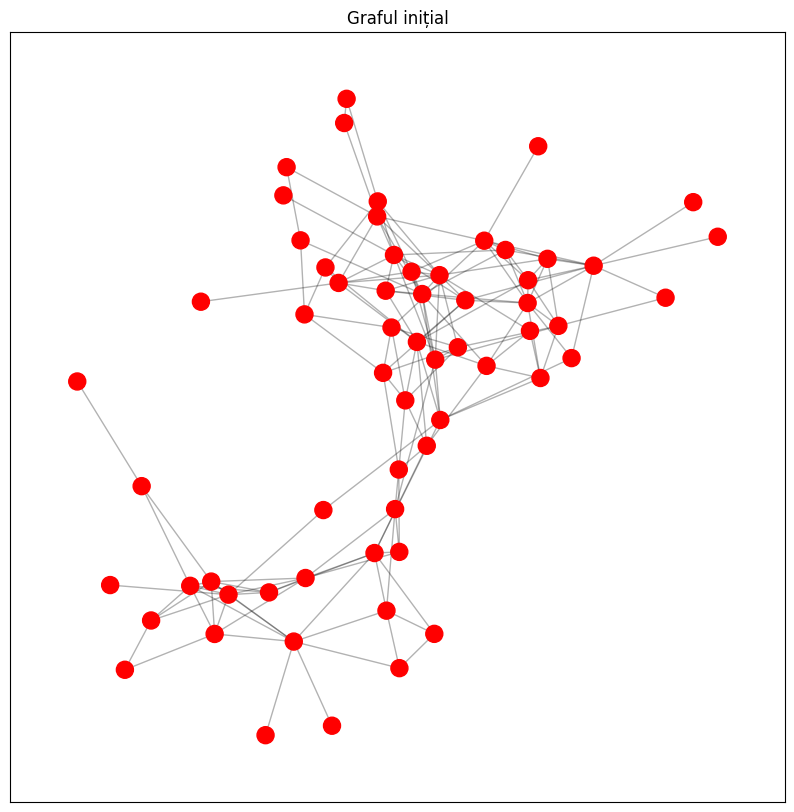

Iterația 1 
Muchia (1, 36) eliminată
Iterația 2 
Muchia (7, 40) eliminată
Iterația 3 
Muchia (1, 28) eliminată
Iterația 4 
Muchia (36, 39) eliminată
Iterația 5 
Muchia (7, 30) eliminată
Iterația 6 
Muchia (19, 30) eliminată
Numărul de comunități: 2
Comunitatea 1: [0, 2, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 23, 24, 28, 29, 30, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 58, 59, 61]
Comunitatea 2: [1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57, 60]
Comunitatea  1 :  [1, 3, 4, 5, 9, 11, 12, 13, 15, 16, 17, 19, 21, 22, 24, 25, 29, 30, 31, 34, 35, 36, 37, 38, 39, 41, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 56, 59, 60, 62]
Comunitatea  2 :  [2, 6, 7, 8, 10, 14, 18, 20, 23, 26, 27, 28, 32, 33, 40, 42, 49, 55, 57, 58, 61]


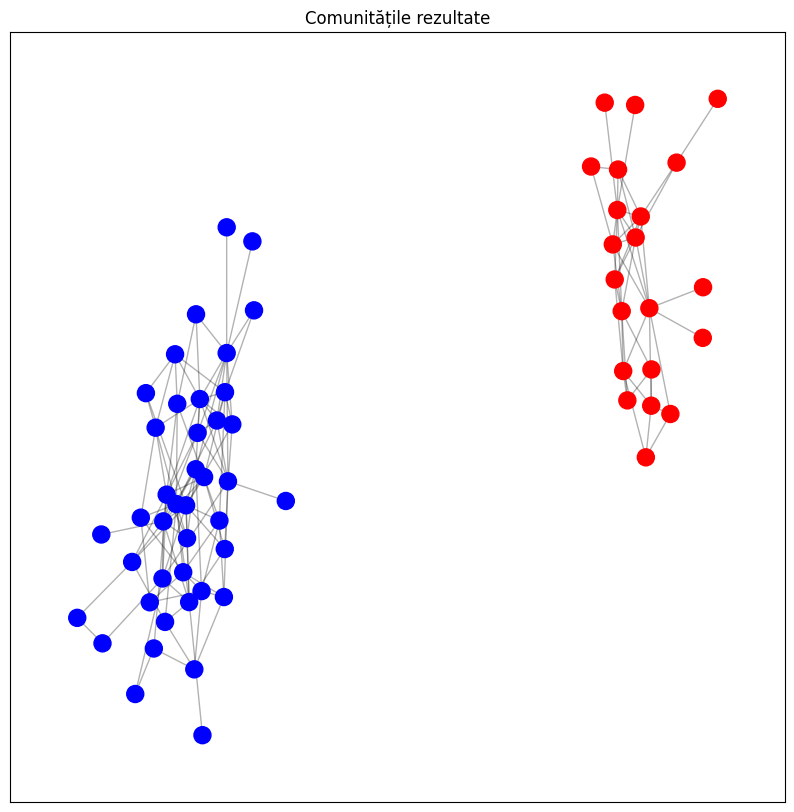

Modularitatea: 0.40975693109487205


In [3]:
crtDir = os.getcwd()
file_path = 'C:/Users/Personal PC/Videos/UBB Info/an2/an2 sem2/Inteligenta artificiala/real/dolphins/dolphins.gml'
num_iterations = 6
filePath = os.path.join(crtDir, file_path)  # asigură-te că calea către fișierul gml este corectă
detect_communities(filePath, num_iterations)

<h1>Football</h1>

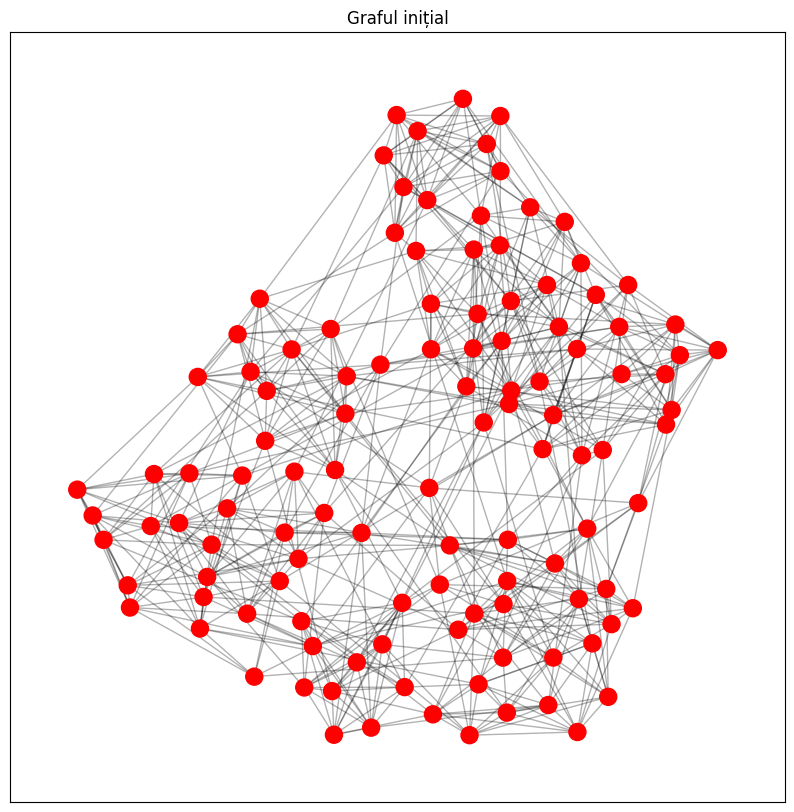

Iterația 1 
Muchia (20, 21) eliminată
Iterația 2 
Muchia (51, 101) eliminată
Iterația 3 
Muchia (102, 103) eliminată
Iterația 4 
Muchia (3, 26) eliminată
Iterația 5 
Muchia (28, 38) eliminată
Iterația 6 
Muchia (16, 38) eliminată
Iterația 7 
Muchia (71, 72) eliminată
Iterația 8 
Muchia (30, 50) eliminată
Iterația 9 
Muchia (0, 35) eliminată
Iterația 10 
Muchia (88, 89) eliminată
Iterația 11 
Muchia (25, 53) eliminată
Iterația 12 
Muchia (24, 25) eliminată
Iterația 13 
Muchia (69, 70) eliminată
Iterația 14 
Muchia (0, 33) eliminată
Iterația 15 
Muchia (0, 1) eliminată
Iterația 16 
Muchia (69, 95) eliminată
Iterația 17 
Muchia (80, 110) eliminată
Iterația 18 
Muchia (13, 45) eliminată
Iterația 19 
Muchia (25, 106) eliminată
Iterația 20 
Muchia (80, 93) eliminată
Iterația 21 
Muchia (16, 17) eliminată
Iterația 22 
Muchia (87, 104) eliminată
Iterația 23 
Muchia (0, 65) eliminată
Iterația 24 
Muchia (28, 113) eliminată
Iterația 25 
Muchia (24, 87) eliminată
Iterația 26 
Muchia (91, 93) elim

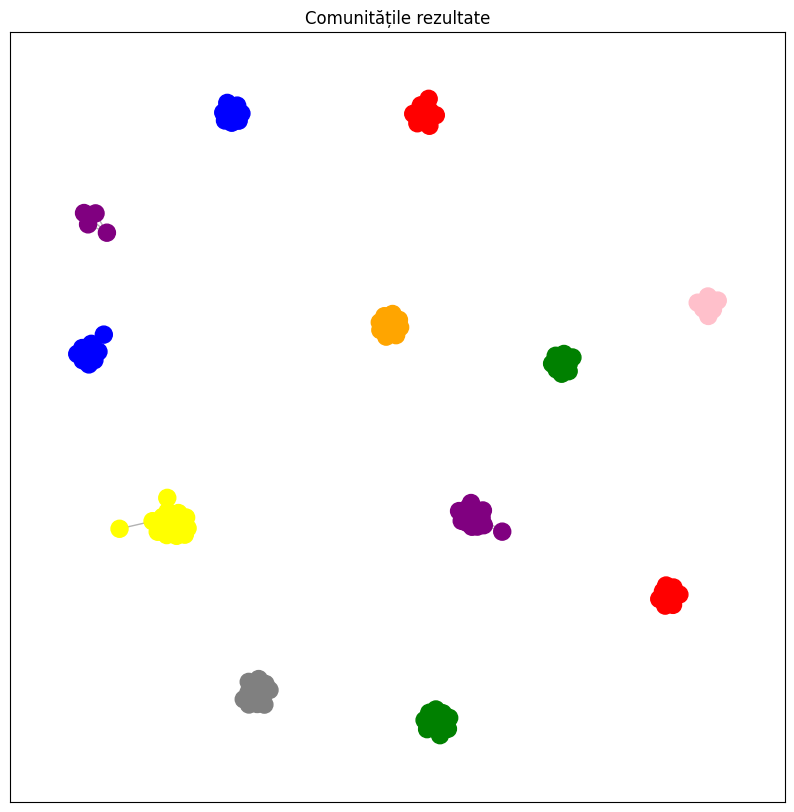

Modularitatea: 0.904058956916085


In [4]:
crtDir = os.getcwd()
file_path = 'C:/Users/Personal PC/Videos/UBB Info/an2/an2 sem2/Inteligenta artificiala/real/football/football.gml'
num_iterations = 193
filePath = os.path.join(crtDir, file_path)  # asigură-te că calea către fișierul gml este corectă
detect_communities(filePath, num_iterations)

<h1>Karate</h1>

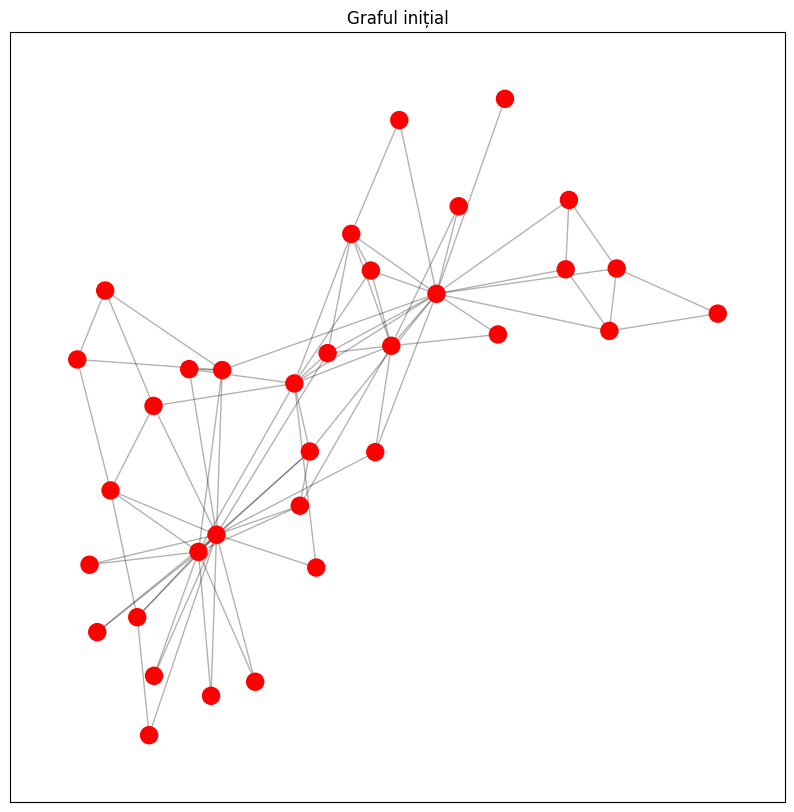

Iterația 1 
Muchia (1, 32) eliminată
Iterația 2 
Muchia (1, 3) eliminată
Iterația 3 
Muchia (1, 9) eliminată
Iterația 4 
Muchia (14, 34) eliminată
Iterația 5 
Muchia (20, 34) eliminată
Iterația 6 
Muchia (3, 33) eliminată
Iterația 7 
Muchia (2, 31) eliminată
Iterația 8 
Muchia (2, 3) eliminată
Iterația 9 
Muchia (3, 4) eliminată
Iterația 10 
Muchia (3, 8) eliminată
Iterația 11 
Muchia (3, 14) eliminată
Numărul de comunități: 2
Comunitatea 1: [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea 2: [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea  1 :  [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea  2 :  [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


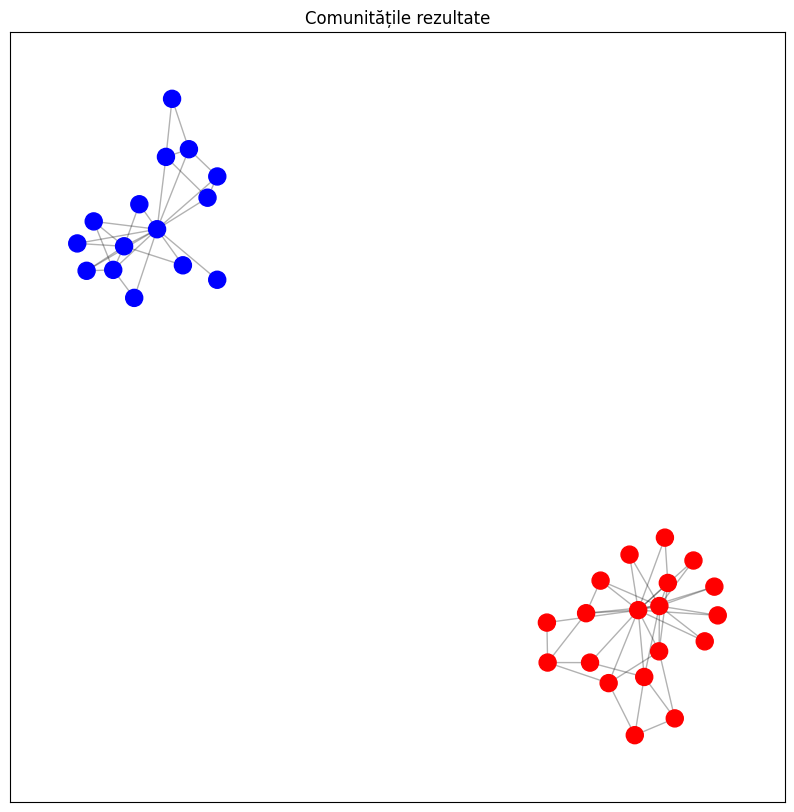

Modularitatea: 0.5933949654711513


In [5]:
crtDir = os.getcwd()
file_path = 'C:/Users/Personal PC/Videos/UBB Info/an2/an2 sem2/Inteligenta artificiala/real/karate/karate.gml'
filePath = os.path.join(crtDir, file_path)  # asigură-te că calea către fișierul gml este corectă
detect_communities(filePath, num_iterations=11)

<h1>Krebs</h1>

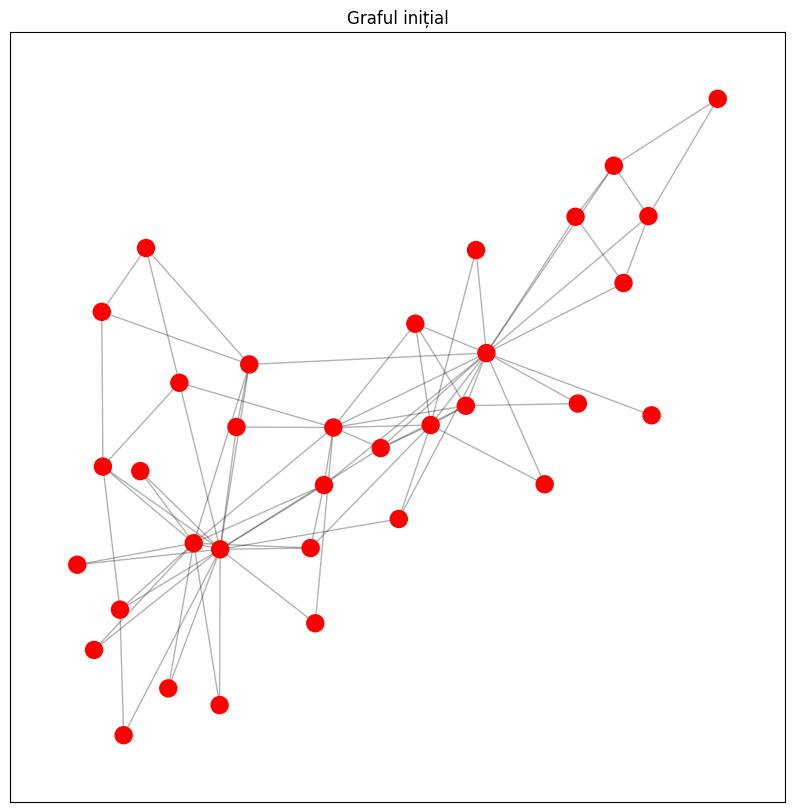

Iterația 1 
Muchia (1, 32) eliminată
Iterația 2 
Muchia (1, 3) eliminată
Iterația 3 
Muchia (1, 9) eliminată
Iterația 4 
Muchia (14, 34) eliminată
Iterația 5 
Muchia (20, 34) eliminată
Iterația 6 
Muchia (3, 33) eliminată
Iterația 7 
Muchia (2, 31) eliminată
Iterația 8 
Muchia (2, 3) eliminată
Iterația 9 
Muchia (3, 4) eliminată
Iterația 10 
Muchia (3, 8) eliminată
Iterația 11 
Muchia (3, 14) eliminată
Iterația 12 
Muchia (10, 34) eliminată
Iterația 13 
Muchia (28, 34) eliminată
Iterația 14 
Muchia (3, 10) eliminată
Numărul de comunități: 3
Comunitatea 1: [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea 2: [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea 3: [10]
Comunitatea  1 :  [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea  2 :  [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea  3 :  [10]


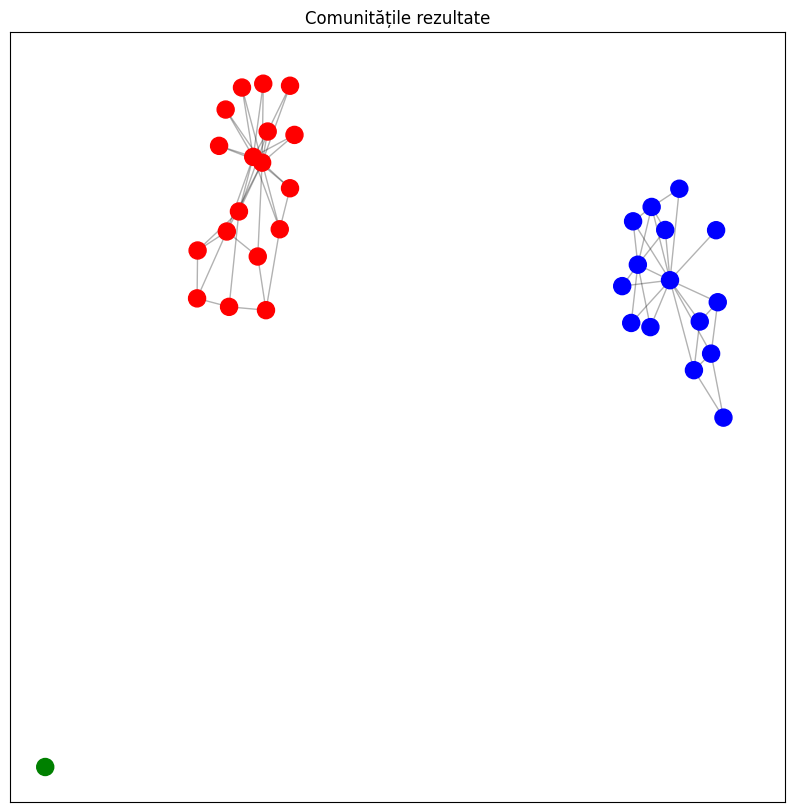

Modularitatea: 0.61199951171875


In [6]:
file_path = 'C:/Users/Personal PC/Videos/UBB Info/an2/an2 sem2/Inteligenta artificiala/real/krebs/krebs.gml'
num_iterations = 14
detect_communities(file_path, num_iterations)

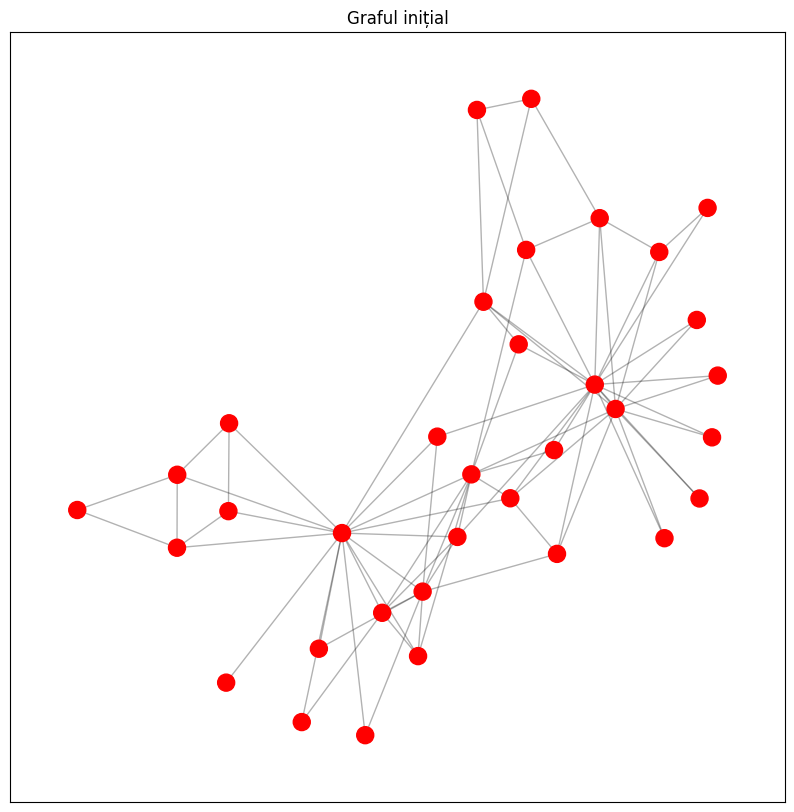

Iterația 1 
Muchia (1, 32) eliminată
Iterația 2 
Muchia (1, 3) eliminată
Iterația 3 
Muchia (1, 9) eliminată
Iterația 4 
Muchia (14, 34) eliminată
Iterația 5 
Muchia (20, 34) eliminată
Iterația 6 
Muchia (3, 33) eliminată
Iterația 7 
Muchia (2, 31) eliminată
Iterația 8 
Muchia (2, 3) eliminată
Iterația 9 
Muchia (3, 4) eliminată
Iterația 10 
Muchia (3, 8) eliminată
Iterația 11 
Muchia (3, 14) eliminată
Iterația 12 
Muchia (10, 34) eliminată
Iterația 13 
Muchia (28, 34) eliminată
Iterația 14 
Muchia (3, 10) eliminată
Numărul de comunități: 3
Comunitatea 1: [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea 2: [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea 3: [10]
Comunitatea  1 :  [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea  2 :  [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea  3 :  [10]


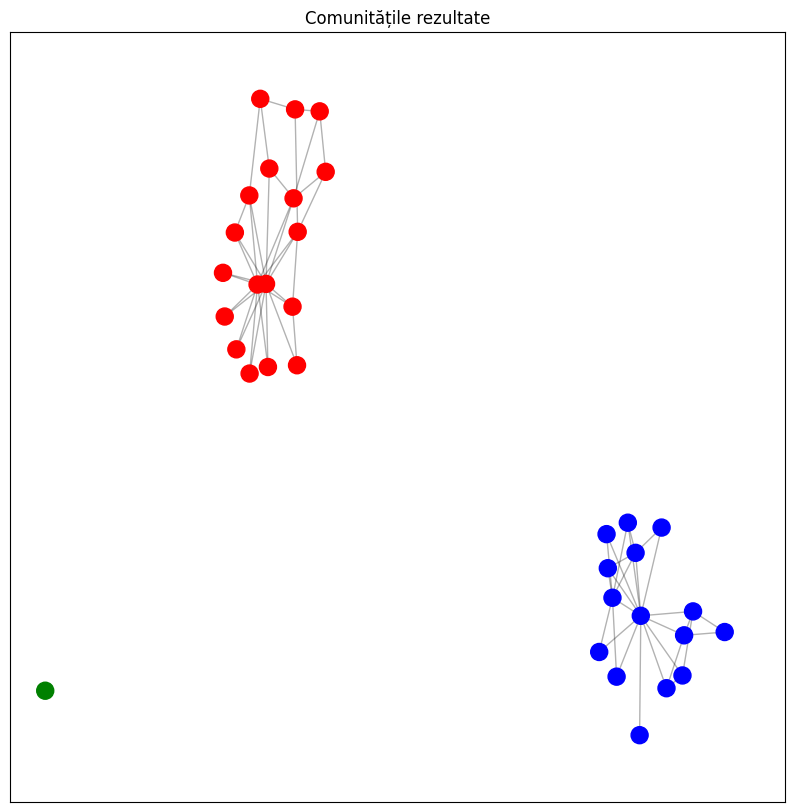

Modularitatea: 0.61199951171875


In [8]:
G = nx.davis_southern_women_graph()
num_iterations = 14  
detect_communities(G, num_iterations)

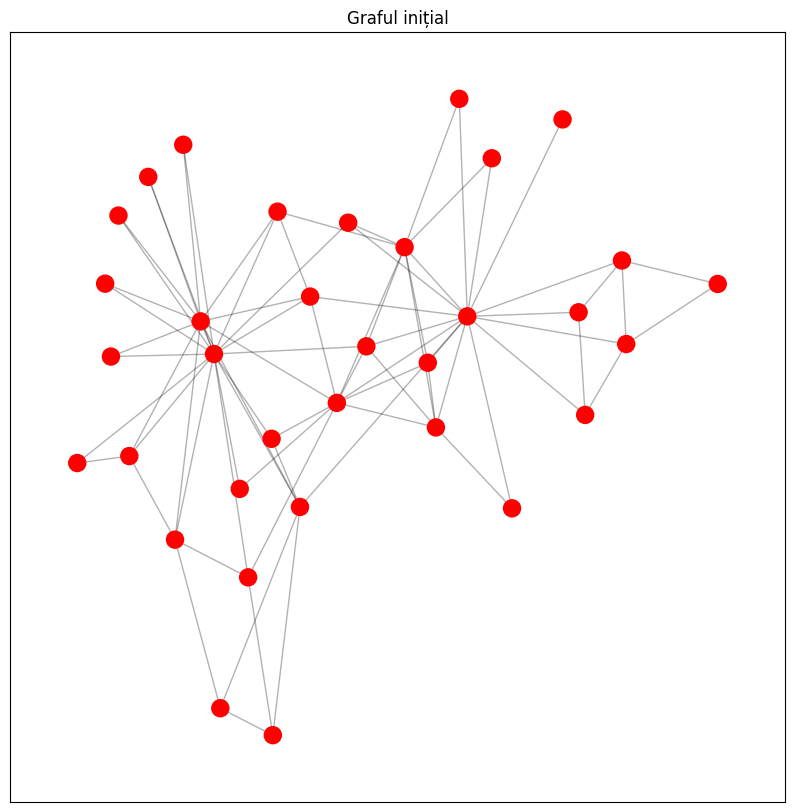

Iterația 1 
Muchia (1, 32) eliminată
Iterația 2 
Muchia (1, 3) eliminată
Iterația 3 
Muchia (1, 9) eliminată
Iterația 4 
Muchia (14, 34) eliminată
Iterația 5 
Muchia (20, 34) eliminată
Iterația 6 
Muchia (3, 33) eliminată
Iterația 7 
Muchia (2, 31) eliminată
Iterația 8 
Muchia (2, 3) eliminată
Iterația 9 
Muchia (3, 4) eliminată
Iterația 10 
Muchia (3, 8) eliminată
Iterația 11 
Muchia (3, 14) eliminată
Iterația 12 
Muchia (10, 34) eliminată
Iterația 13 
Muchia (28, 34) eliminată
Iterația 14 
Muchia (3, 10) eliminată
Numărul de comunități: 3
Comunitatea 1: [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea 2: [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea 3: [10]
Comunitatea  1 :  [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea  2 :  [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea  3 :  [10]


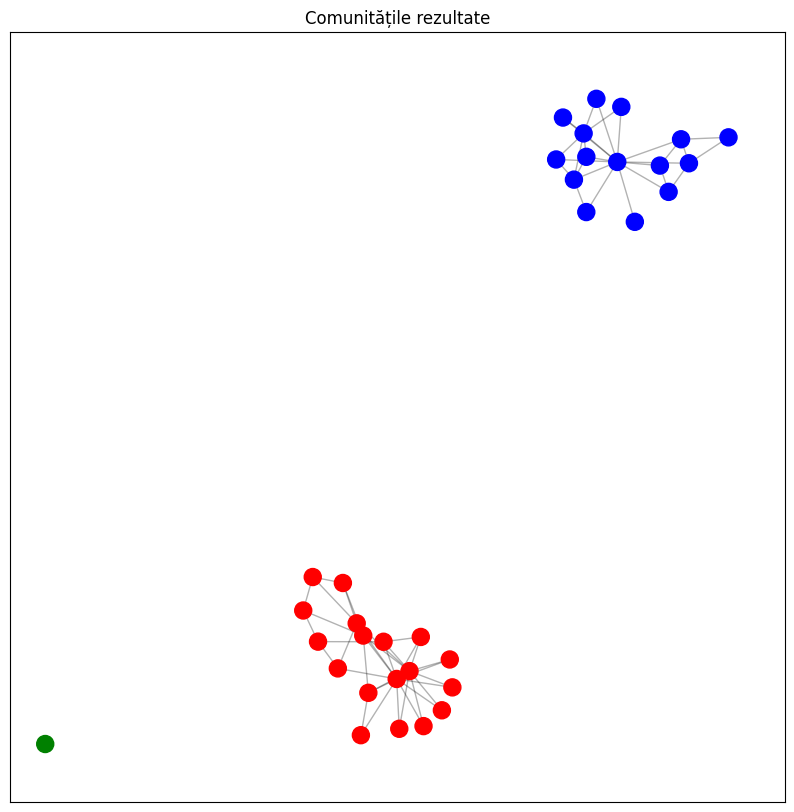

Modularitatea: 0.61199951171875


In [9]:
G = nx.florentine_families_graph()
num_iterations = 14  
detect_communities(G, num_iterations)

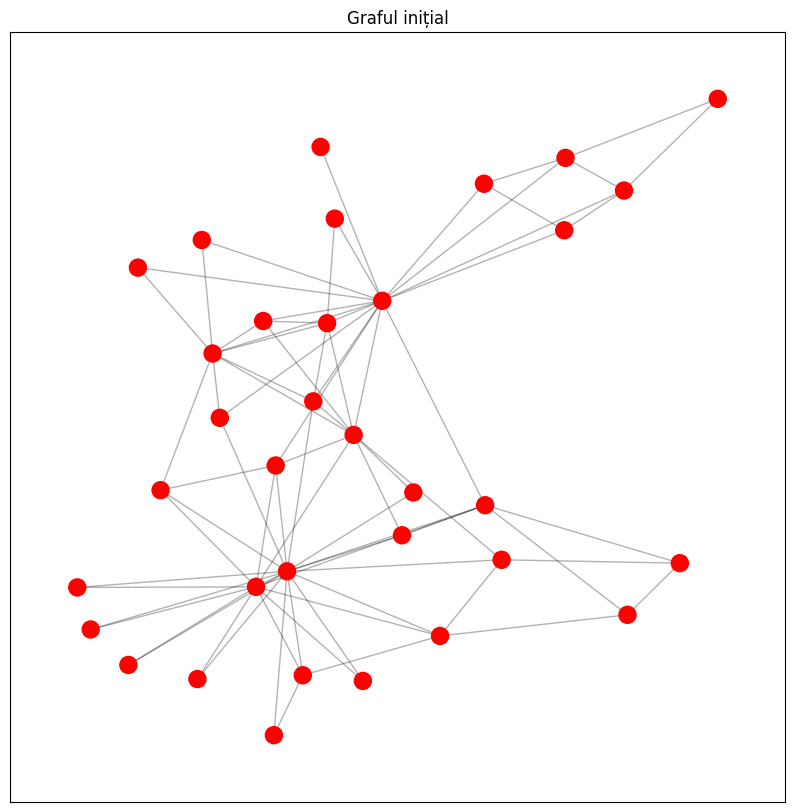

Iterația 1 
Muchia (1, 32) eliminată
Iterația 2 
Muchia (1, 3) eliminată
Iterația 3 
Muchia (1, 9) eliminată
Iterația 4 
Muchia (14, 34) eliminată
Iterația 5 
Muchia (20, 34) eliminată
Iterația 6 
Muchia (3, 33) eliminată
Iterația 7 
Muchia (2, 31) eliminată
Iterația 8 
Muchia (2, 3) eliminată
Iterația 9 
Muchia (3, 4) eliminată
Iterația 10 
Muchia (3, 8) eliminată
Iterația 11 
Muchia (3, 14) eliminată
Iterația 12 
Muchia (10, 34) eliminată
Iterația 13 
Muchia (28, 34) eliminată
Iterația 14 
Muchia (3, 10) eliminată
Numărul de comunități: 3
Comunitatea 1: [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea 2: [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea 3: [10]
Comunitatea  1 :  [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea  2 :  [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea  3 :  [10]


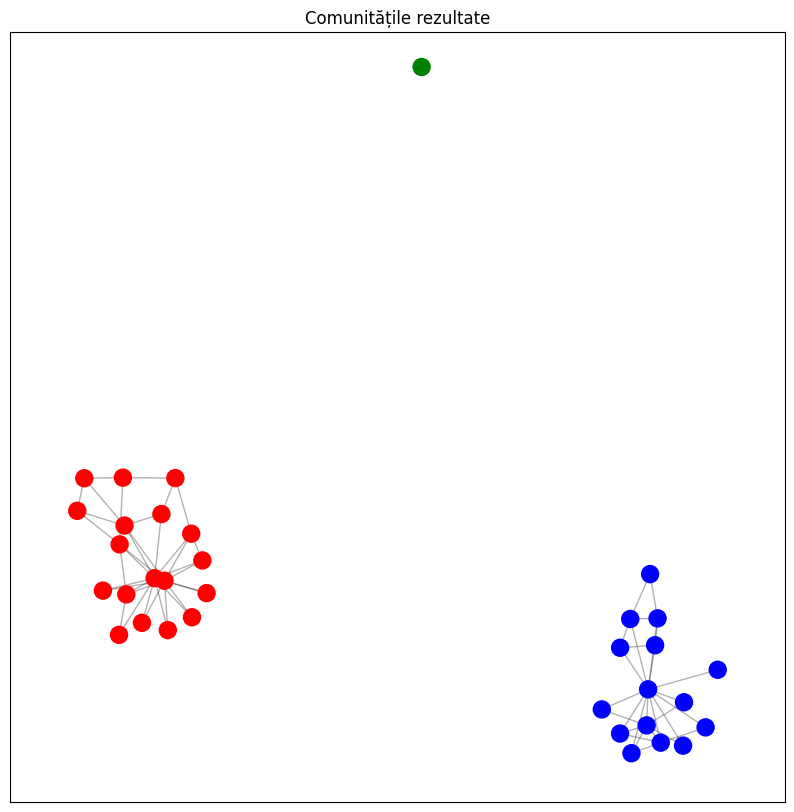

Modularitatea: 0.61199951171875


In [10]:
G = nx.les_miserables_graph()
num_iterations = 14  
detect_communities(G, num_iterations)

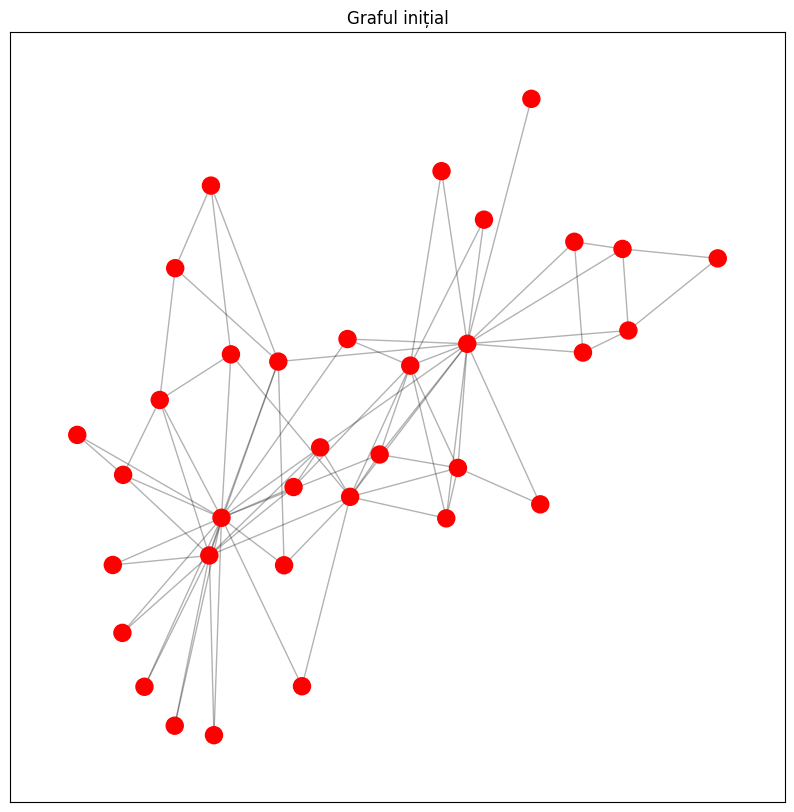

Iterația 1 
Muchia (1, 32) eliminată
Iterația 2 
Muchia (1, 3) eliminată
Iterația 3 
Muchia (1, 9) eliminată
Iterația 4 
Muchia (14, 34) eliminată
Iterația 5 
Muchia (20, 34) eliminată
Iterația 6 
Muchia (3, 33) eliminată
Iterația 7 
Muchia (2, 31) eliminată
Iterația 8 
Muchia (2, 3) eliminată
Iterația 9 
Muchia (3, 4) eliminată
Iterația 10 
Muchia (3, 8) eliminată
Iterația 11 
Muchia (3, 14) eliminată
Numărul de comunități: 2
Comunitatea 1: [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea 2: [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea  1 :  [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea  2 :  [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


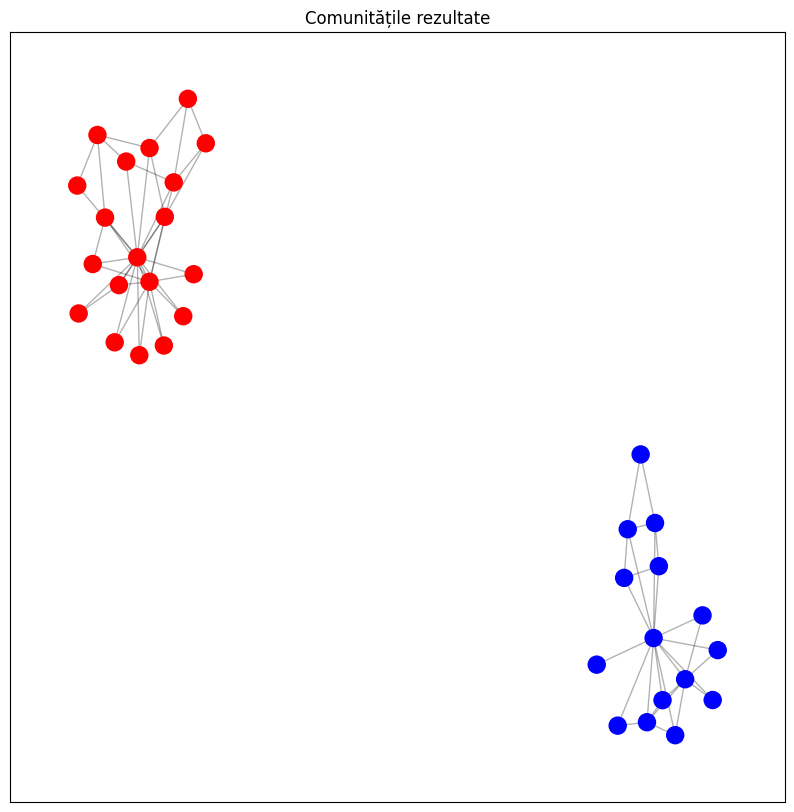

Modularitatea: 0.5933949654711513


In [13]:
G = nx.karate_club_graph()
num_iterations = 11
detect_communities(G, num_iterations)

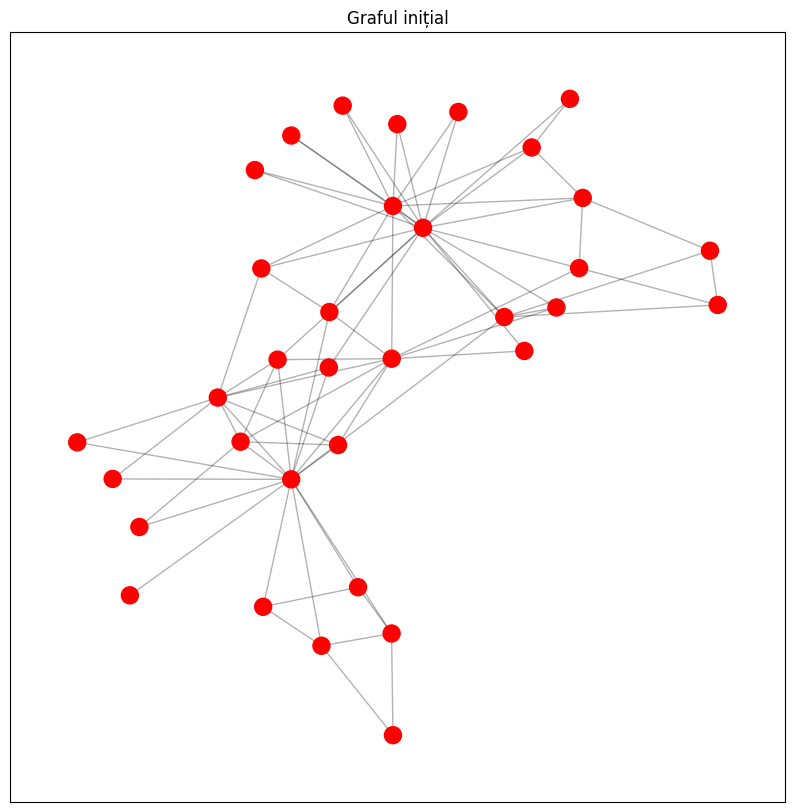

Iterația 1 
Muchia (1, 32) eliminată
Iterația 2 
Muchia (1, 3) eliminată
Iterația 3 
Muchia (1, 9) eliminată
Iterația 4 
Muchia (14, 34) eliminată
Iterația 5 
Muchia (20, 34) eliminată
Iterația 6 
Muchia (3, 33) eliminată
Iterația 7 
Muchia (2, 31) eliminată
Iterația 8 
Muchia (2, 3) eliminată
Iterația 9 
Muchia (3, 4) eliminată
Iterația 10 
Muchia (3, 8) eliminată
Iterația 11 
Muchia (3, 14) eliminată
Numărul de comunități: 2
Comunitatea 1: [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea 2: [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea  1 :  [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea  2 :  [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


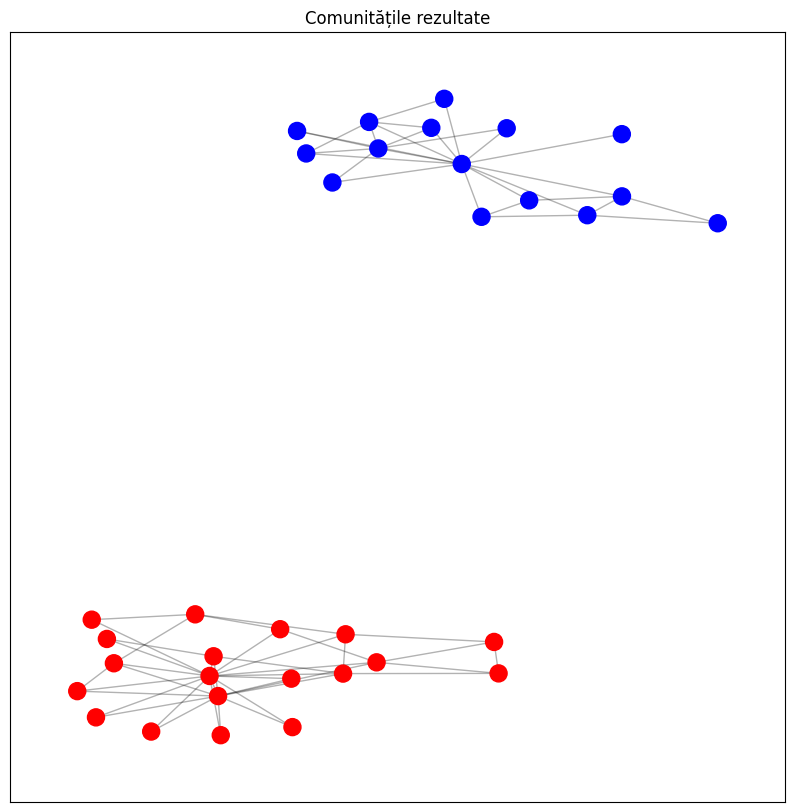

Modularitatea: 0.5933949654711513


In [14]:
G = nx.petersen_graph()
num_iterations = 11  
detect_communities(G, num_iterations)

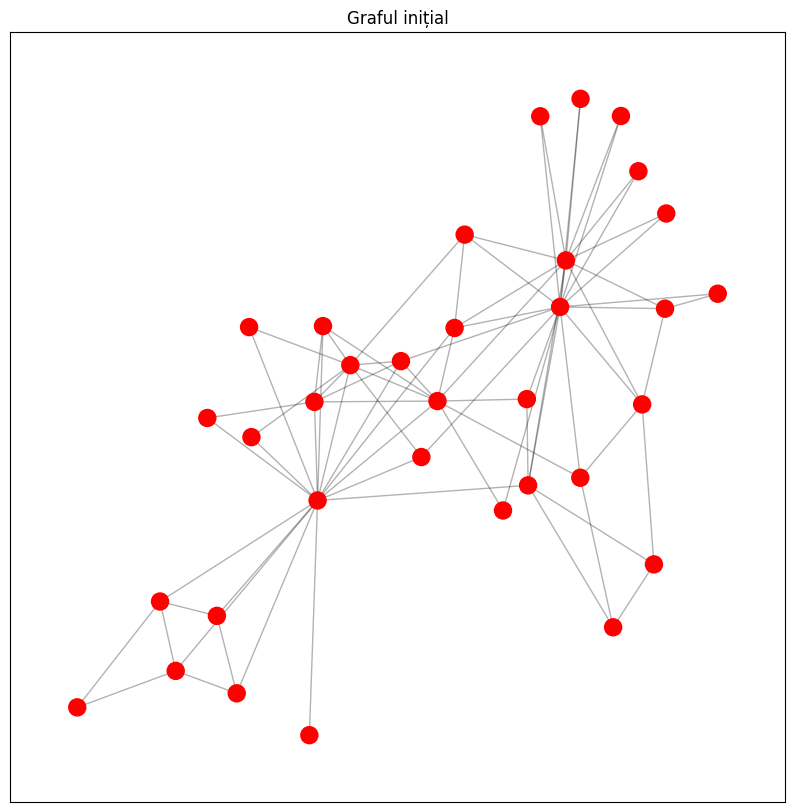

Iterația 1 
Muchia (1, 32) eliminată
Iterația 2 
Muchia (1, 3) eliminată
Iterația 3 
Muchia (1, 9) eliminată
Iterația 4 
Muchia (14, 34) eliminată
Iterația 5 
Muchia (20, 34) eliminată
Iterația 6 
Muchia (3, 33) eliminată
Iterația 7 
Muchia (2, 31) eliminată
Iterația 8 
Muchia (2, 3) eliminată
Iterația 9 
Muchia (3, 4) eliminată
Iterația 10 
Muchia (3, 8) eliminată
Iterația 11 
Muchia (3, 14) eliminată
Iterația 12 
Muchia (10, 34) eliminată
Iterația 13 
Muchia (28, 34) eliminată
Iterația 14 
Muchia (3, 10) eliminată
Iterația 15 
Muchia (1, 6) eliminată
Iterația 16 
Muchia (1, 7) eliminată
Iterația 17 
Muchia (1, 5) eliminată
Iterația 18 
Muchia (1, 11) eliminată
Iterația 19 
Muchia (32, 34) eliminată
Iterația 20 
Muchia (32, 33) eliminată
Iterația 21 
Muchia (29, 34) eliminată
Iterația 22 
Muchia (24, 26) eliminată
Iterația 23 
Muchia (24, 28) eliminată
Iterația 24 
Muchia (3, 9) eliminată
Numărul de comunități: 5
Comunitatea 1: [1, 2, 4, 8, 12, 13, 14, 18, 20, 22]
Comunitatea 2: [3, 2

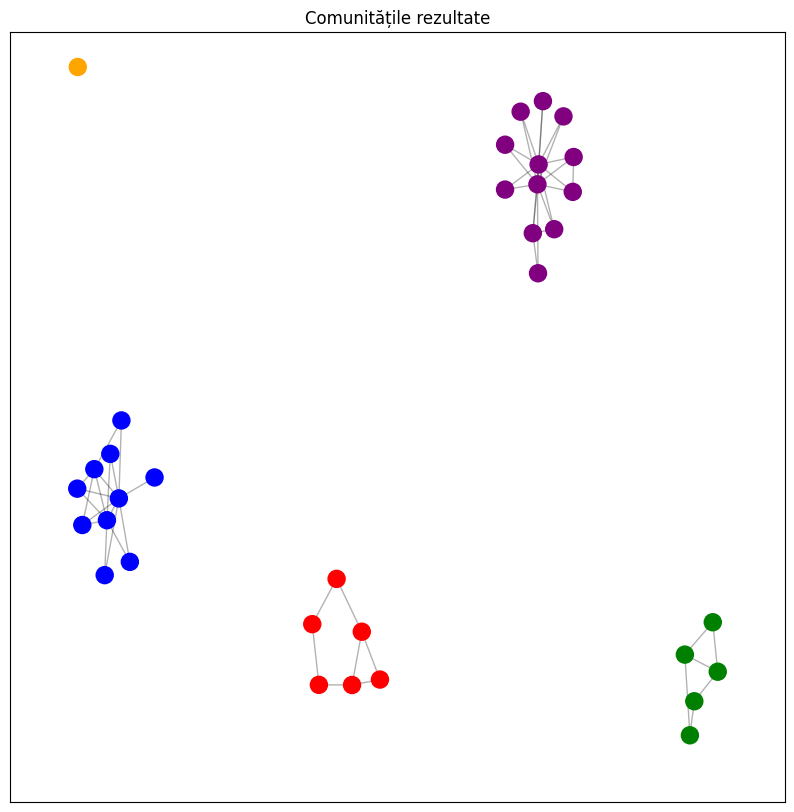

Modularitatea: 0.781635802469134


In [15]:
G = nx.tutte_graph()
num_iterations = 24  
detect_communities(G, num_iterations)